In [22]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline 
if 'inline' in matplotlib.get_backend():
    from IPython import display

In [23]:
# make gym environment
env = gym.make('MountainCar-v0')

# print action space, observation space

n_action = env.action_space.n
env_low = env.observation_space.low
env_high = env.observation_space.high
bins = 30 # number of states for discretization

print('Number of actions possible: ', n_action)
print('Observation space: ', env.observation_space)
print('Highest value: ', env_high)
print('Lowest value: ', env_low)

Number of actions possible:  3
Observation space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Highest value:  [0.6  0.07]
Lowest value:  [-1.2  -0.07]


In [24]:
# space discretization

def getState(state, env_low = env_low, env_high = env_high, bins = bins):
    """Returns the discretized position and velocity of an observation"""
    discretized_env = (env_high - env_low) / bins
    discretized_pos = int((state[0] - env_low[0]) / discretized_env[0])
    discretized_vel = int((state[1] - env_low[1]) / discretized_env[1])
    return discretized_pos, discretized_vel

# 0. Random agent

In [45]:
n_eps = 100001 # number of episodes
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.2 # explore-exploit tradeoff factor
interval = 10000

In [46]:
# establish q-table
q_table_rand = np.zeros((bins, bins, env.action_space.n))

In [47]:
# store reward
rewards_rand = []

# training 

for ep in range(n_eps):
    
    state = env.reset()
    current_reward = 0
    done = False

    # discretize the state
    pos, vel = getState(state)

    while not done:
        
        # render for the last 10 episodes
        if ep >= (n_eps - 10): 
            env.render()

        # next action
        action = env.action_space.sample()

        # next state
        next_state, reward, done, info = env.step(action)
        # discretize next state
        next_pos, next_vel = getState(next_state)

        if done and next_state[0] >= env.goal_position:
            q_table_q[next_pos][next_vel][action] = reward
        
        else:
            # update Q value: Q(S, A) <-- Q(S, A) + alpha [R + gamma * Q(S', A') - Q(S, A)]
            q_table_q[pos][vel][action] += \
            alpha * (reward + gamma * np.max(q_table_q[next_pos][next_vel]) - q_table_q[pos][vel][action])
        
            
        # reassign state, action, reward
        state = next_state
        pos, vel = next_pos, next_vel
        current_reward += reward

    if ep % interval == 0:
        print('Game no.: ', ep, 'epsilon: ', epsilon, 'with reward: ', current_reward)
    rewards_rand.append(current_reward)

env.close()

Game no.:  0 epsilon:  0.2 with reward:  -200.0
Game no.:  10000 epsilon:  0.2 with reward:  -200.0
Game no.:  20000 epsilon:  0.2 with reward:  -200.0
Game no.:  30000 epsilon:  0.2 with reward:  -200.0
Game no.:  40000 epsilon:  0.2 with reward:  -200.0
Game no.:  50000 epsilon:  0.2 with reward:  -200.0
Game no.:  60000 epsilon:  0.2 with reward:  -200.0
Game no.:  70000 epsilon:  0.2 with reward:  -200.0
Game no.:  80000 epsilon:  0.2 with reward:  -200.0
Game no.:  90000 epsilon:  0.2 with reward:  -200.0
Game no.:  100000 epsilon:  0.2 with reward:  -200.0


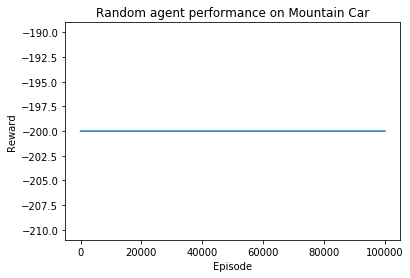

In [48]:
plt.figure()
plt.plot([i for i in range(n_eps)], rewards_rand)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Random agent performance on Mountain Car')
plt.show()

# 1. Q-Learning

In [25]:
n_eps = 100001 # number of episodes
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.2 # explore-exploit tradeoff factor
interval = 10000

In [26]:
# choose action
def chooseAction(pos, vel, q_table, epsilon = epsilon):
    """Choose action based on an epsilon greedy strategy"""

    if random.random() < epsilon: # explore
        action = env.action_space.sample()
    else: # exploit
        action = np.argmax(q_table[pos][vel])
    return action

In [27]:
# establish q-table
q_table_q = np.zeros((bins, bins, env.action_space.n))

In [28]:
# store reward
rewards_q = []

# training 

for ep in range(n_eps):
    
    state = env.reset()
    current_reward = 0
    done = False

    # discretize the state
    pos, vel = getState(state)

    while not done:
        
        # render for the last 10 episodes
        if ep >= (n_eps - 10): 
            env.render()

        # next action
        action = chooseAction(pos, vel, q_table_q)

        # next state
        next_state, reward, done, info = env.step(action)
        # discretize next state
        next_pos, next_vel = getState(next_state)

        if done and next_state[0] >= env.goal_position:
            q_table_q[next_pos][next_vel][action] = reward
        
        else:
            # update Q value: Q(S, A) <-- Q(S, A) + alpha [R + gamma * Q(S', A') - Q(S, A)]
            q_table_q[pos][vel][action] += \
            alpha * (reward + gamma * np.max(q_table_q[next_pos][next_vel]) - q_table_q[pos][vel][action])
        
            
        # reassign state, action, reward
        state = next_state
        pos, vel = next_pos, next_vel
        current_reward += reward

    # update epsilon
    if epsilon > 0:
        epsilon*= (n_eps - 2)/n_eps

    if ep % interval == 0:
        print('Game no.: ', ep, 'epsilon: ', epsilon, 'with reward: ', current_reward)
    rewards_q.append(current_reward)

env.close()

Game no.:  0 epsilon:  0.19999600003999962 with reward:  -200.0
Game no.:  10000 epsilon:  0.16374287572423812 with reward:  -170.0
Game no.:  20000 epsilon:  0.1340613279519637 with reward:  -147.0
Game no.:  30000 epsilon:  0.10976013199201175 with reward:  -178.0
Game no.:  40000 epsilon:  0.08986399552315864 with reward:  -200.0
Game no.:  50000 epsilon:  0.07357441672877993 with reward:  -200.0
Game no.:  60000 epsilon:  0.060237637615224854 with reward:  -146.0
Game no.:  70000 epsilon:  0.04931840640802185 with reward:  -170.0
Game no.:  80000 epsilon:  0.04037849601877588 with reward:  -143.0
Game no.:  90000 epsilon:  0.033059116453387716 with reward:  -200.0
Game no.:  100000 epsilon:  0.027066515309793926 with reward:  -200.0


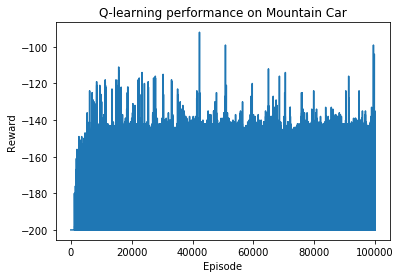

In [39]:
plt.figure()
plt.plot([i for i in range(n_eps)], rewards_q)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning performance on Mountain Car')
plt.show()

Animation links: https://drive.google.com/file/d/1_BqzQxRW02AGrcyGJGzTMWcn51dYNHHx/view?usp=sharing

# 2. SARSA

In [34]:
n_eps = 100001 # number of episodes
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.2 # explore-exploit tradeoff factor
interval = 10000

In [35]:
# establish q-table
q_table_sarsa = np.zeros((bins, bins, env.action_space.n))

In [36]:
# store reward
rewards_sarsa = []

# training 

for ep in range(n_eps):
    
    current_reward = 0
    done = False

    state = env.reset()
    # discretize the state
    pos, vel = getState(state)
    # choose first action
    action = chooseAction(pos, vel, q_table_sarsa)

    while not done:
        
        # render for the last 10 episodes
        if ep >= (n_eps - 10): 
            env.render()
            
        # next state
        next_state, reward, done, info = env.step(action)

        # discretize the state
        next_pos, next_vel = getState(next_state)
        # next action
        next_action = chooseAction(next_pos, next_vel, q_table_sarsa)

        if done and next_state[0] >= env.goal_position:
            q_table_q[next_pos][next_vel][action] = reward
        
        else:
            # update Q value: Q(S, A) <-- Q(S, A) + alpha [R + gamma * Q(S', A') - Q(S, A)]
            q_table_sarsa[pos][vel][action] += \
            alpha * (reward + gamma * q_table_sarsa[next_pos][next_vel][next_action] - q_table_sarsa[pos][vel][action])
        
        # reassign state, action, reward
        state = next_state
        pos, vel = next_pos, next_vel
        action = next_action
        current_reward += reward
    
    # update epsilon
    if epsilon > 0:
        epsilon*= (n_eps - 1)/n_eps

    if ep % interval == 0:
        print('Game no.: ', ep, 'epsilon: ', epsilon, 'with reward: ', current_reward)
    rewards_sarsa.append(current_reward)

env.close()

Game no.:  0 epsilon:  0.19999800001999982 with reward:  -200.0
Game no.:  10000 epsilon:  0.18096576443280718 with reward:  -146.0
Game no.:  20000 epsilon:  0.1637446769141458 with reward:  -164.0
Game no.:  30000 epsilon:  0.14816238475689036 with reward:  -154.0
Game no.:  40000 epsilon:  0.13406293670455294 with reward:  -160.0
Game no.:  50000 epsilon:  0.12130522215432456 with reward:  -150.0
Game no.:  60000 epsilon:  0.10976155888885816 with reward:  -147.0
Game no.:  70000 epsilon:  0.09931641520251411 with reward:  -150.0
Game no.:  80000 epsilon:  0.08986525363279563 with reward:  -118.0
Game no.:  90000 epsilon:  0.08131348472475068 with reward:  -158.0
Game no.:  100000 epsilon:  0.07357552035739598 with reward:  -143.0


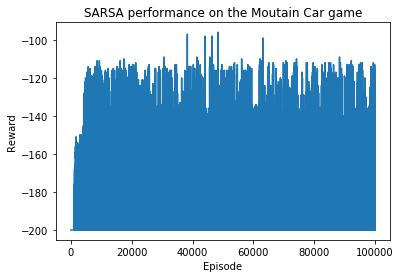

In [40]:
plt.figure()
plt.plot([i for i in range(n_eps)], rewards_sarsa)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA performance on the Moutain Car game')
plt.show()

Animation link: https://drive.google.com/file/d/1YOhF1u6_2XtVRdwSw64PmAHvMiapsyJm/view?usp=sharing